<a href="https://colab.research.google.com/github/Adithya280399/Adithya_INFO5731_Fall2025/blob/main/Suresh_Adithya_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import nltk

# Download both (old + new) just in case
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:

# STEP 1: Upload dataset from computer

from google.colab import files
import io
import pandas as pd
import re
from collections import Counter
import nltk

# Upload CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("✅ Uploaded file:", filename)
print("📊 Shape:", df.shape)
print("📋 Columns:", df.columns.tolist())


# STEP 2: Choose text column

# Try to automatically detect a suitable text column
possible_cols = [c for c in df.columns if 'text' in c.lower() or 'abstract' in c.lower() or 'review' in c.lower()]
if possible_cols:
    text_col = possible_cols[0]
else:
    # if no obvious column found, pick the first one
    text_col = df.columns[0]

print(f"🧠 Using column for analysis: '{text_col}'")

# Extract non-empty text data
texts = df[text_col].dropna().astype(str).tolist()
print(f"Loaded {len(texts)} documents for analysis.")


# STEP 3: Preprocess and tokenize

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    return tokens

tokenized_texts = [preprocess(t) for t in texts]


# STEP 4: Generate N-grams

def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

bigram_freq = Counter()
trigram_freq = Counter()

for tokens in tokenized_texts:
    bigram_freq.update(generate_ngrams(tokens, 2))
    trigram_freq.update(generate_ngrams(tokens, 3))

print(f"🔹 Total unique bigrams: {len(bigram_freq)}")
print(f"🔹 Total unique trigrams: {len(trigram_freq)}")


# STEP 5: Calculate Bigram Probabilities

unigram_freq = Counter()
for tokens in tokenized_texts:
    unigram_freq.update(tokens)

bigram_prob = {}
for (w1, w2), count in bigram_freq.items():
    if unigram_freq[w1] > 0:
        bigram_prob[(w1, w2)] = count / unigram_freq[w1]

print("\nTop 10 Bigram Probabilities:")
for (w1, w2), prob in list(bigram_prob.items())[:10]:
    print(f"P({w2}|{w1}) = {prob:.4f}")


# STEP 6: Noun Phrase Extraction

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    noun_phrases = []
    current_phrase = []
    for word, tag in pos_tags:
        if tag.startswith('JJ') or tag.startswith('NN'):
            current_phrase.append(word.lower())
        else:
            if current_phrase:
                noun_phrases.append(" ".join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases

noun_phrase_list = [extract_noun_phrases(t) for t in texts]

# Flatten and count
all_np = [np for sublist in noun_phrase_list for np in sublist]
np_freq = Counter(all_np)
max_np_freq = max(np_freq.values()) if np_freq else 1


# STEP 7: Relative Probabilities per Review

review_prob_matrix = []
for doc_nps in noun_phrase_list:
    doc_counter = Counter(doc_nps)
    row = {np: doc_counter[np] / max_np_freq for np in np_freq.keys()}
    review_prob_matrix.append(row)

np_prob_df = pd.DataFrame(review_prob_matrix)
np_prob_df.index = [f"Review_{i+1}" for i in range(len(np_prob_df))]
np_prob_df.fillna(0, inplace=True)

print("\n📋 Noun Phrase Probability Table (sample):")
display(np_prob_df.head())


# STEP 8: Save the results

np_prob_df.to_csv('noun_phrase_probabilities.csv', index=True)
print("💾 Saved 'noun_phrase_probabilities.csv' successfully!")


Saving semantic_scholar_papers_cleaned.csv to semantic_scholar_papers_cleaned (4).csv
✅ Uploaded file: semantic_scholar_papers_cleaned (4).csv
📊 Shape: (1000, 6)
📋 Columns: ['title', 'abstract', 'authors', 'year', 'url', 'cleaned_abstract']
🧠 Using column for analysis: 'abstract'
Loaded 499 documents for analysis.
🔹 Total unique bigrams: 45426
🔹 Total unique trigrams: 70182

Top 10 Bigram Probabilities:
P(present|we) = 0.0626
P(fashionmnist|present) = 0.0100
P(a|fashionmnist) = 0.5000
P(new|a) = 0.0326
P(dataset|new) = 0.0113
P(comprising|dataset) = 0.0141
P(of|comprising) = 0.3333
P(x|of) = 0.0003
P(grayscale|x) = 0.3333
P(images|grayscale) = 1.0000


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



📋 Noun Phrase Probability Table (sample):


,present fashion-mnist,new dataset comprising,grayscale images,fashion products,categories,images,category,training set,test set,fashion-mnist,...,embedding space,objective w1 + r = w2,low-dimensional space,multi-hop dependency paths,grammatical relations,consider linear context,dependency context information,conditional random field,words yields better performance,other representative ones
Review_1,0.004255,0.004255,0.004255,0.004255,0.004255,0.012766,0.004255,0.004255,0.004255,0.004255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


💾 Saved 'noun_phrase_probabilities.csv' successfully!


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
# TF-IDF and Document Ranking (from scratch)
import math
import re
import numpy as np
import pandas as pd
from google.colab import files
import io

# Step 1: Upload your CSV again if needed
try:
    df
except NameError:
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 2: Choose the text column automatically
possible_cols = [c for c in df.columns if 'text' in c.lower() or 'abstract' in c.lower() or 'review' in c.lower()]
text_col = possible_cols[0] if possible_cols else df.columns[0]
texts = df[text_col].dropna().astype(str).tolist()

print(f"✅ Using column: '{text_col}' — {len(texts)} documents")

# Step 3: Basic preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

tokenized_docs = [preprocess(t) for t in texts]
N = len(tokenized_docs)

# Step 4: Compute term frequencies (TF)
def compute_tf(doc_tokens):
    tf = {}
    total_terms = len(doc_tokens)
    for w in doc_tokens:
        tf[w] = tf.get(w, 0) + 1
    for w in tf:
        tf[w] = tf[w] / total_terms
    return tf

tf_list = [compute_tf(doc) for doc in tokenized_docs]

# Step 5: Compute document frequencies (DF)
df_counts = {}
for doc in tokenized_docs:
    for term in set(doc):
        df_counts[term] = df_counts.get(term, 0) + 1

# Step 6: Compute IDF
idf = {}
for term, df_val in df_counts.items():
    idf[term] = math.log(N / (1 + df_val))  # +1 avoids div-by-zero

# Step 7: Compute TF-IDF vectors
tfidf_vectors = []
for tf in tf_list:
    vec = {}
    for term, val in tf.items():
        vec[term] = val * idf[term]
    tfidf_vectors.append(vec)

# Step 8: Build Vocabulary and TF-IDF Matrix
vocab = sorted(idf.keys())
vocab_index = {term: i for i, term in enumerate(vocab)}
tfidf_matrix = np.zeros((N, len(vocab)))

for i, vec in enumerate(tfidf_vectors):
    for term, val in vec.items():
        tfidf_matrix[i][vocab_index[term]] = val

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Step 9: Query Representation
query = "An outstanding model with excellent performance in text classification"
print(f"\n🔍 Query: {query}")

query_tokens = preprocess(query)
query_tf = compute_tf(query_tokens)

query_vec = np.zeros(len(vocab))
for term, val in query_tf.items():
    if term in idf:
        query_vec[vocab_index[term]] = val * idf[term]

# Step 10: Cosine Similarity
def cosine_similarity(vecA, vecB):
    dot = np.dot(vecA, vecB)
    normA = np.linalg.norm(vecA)
    normB = np.linalg.norm(vecB)
    return dot / (normA * normB + 1e-10)  # +epsilon to avoid div-by-zero

scores = [cosine_similarity(query_vec, doc_vec) for doc_vec in tfidf_matrix]

# Step 11: Rank and Show Top Documents
top_indices = np.argsort(scores)[::-1][:5]
print("\n🏆 Top 5 Most Relevant Documents:")
for rank, idx in enumerate(top_indices, 1):
    print(f"\nRank {rank} (Score={scores[idx]:.4f}):")
    print(texts[idx][:400], "...")


✅ Using column: 'abstract' — 499 documents
TF-IDF matrix shape: (499, 7537)

🔍 Query: An outstanding model with excellent performance in text classification

🏆 Top 5 Most Relevant Documents:

Rank 1 (Score=0.1137):
Extreme learning machine (ELM) is a training algorithm for single hidden layer feedforward neural network (SLFN), which converges much faster than traditional methods and yields promising performance. In this paper, we hope to present a comprehensive review on ELM. Firstly, we will focus on the theoretical analysis including universal approximation theory and generalization. Then, the various impr ...

Rank 2 (Score=0.1134):
The amount of text that is generated every day is increasing dramatically. This tremendous volume of mostly unstructured text cannot be simply processed and perceived by computers. Therefore, efficient and effective techniques and algorithms are required to discover useful patterns. Text mining is the task of extracting meaningful information from text, 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
!pip install gensim
!pip install scikit-learn

Saving semantic_scholar_papers_cleaned.csv to semantic_scholar_papers_cleaned (5).csv
✅ Uploaded file: semantic_scholar_papers_cleaned (5).csv
📊 Shape: (1000, 6)
✅ Word2Vec model trained with vocabulary size: 4305


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


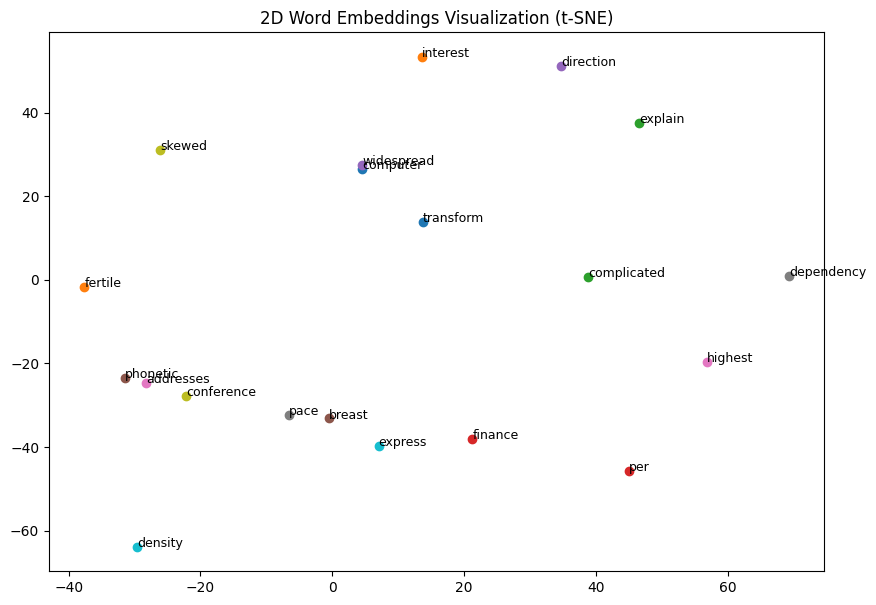

Similarity(data, information) = 0.8547
Similarity(model, algorithm) = 0.8763
Similarity(neural, network) = 0.9507
Similarity(paper, study) = 0.9315


In [ ]:
import numpy as np
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from google.colab import files

# Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("✅ Uploaded file:", filename)
print("📊 Shape:", df.shape)

# Use 'abstract' or any text column
text_column = 'abstract' if 'abstract' in df.columns else df.columns[0]
texts = df[text_column].dropna().astype(str).tolist()

# Preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

sentences = [preprocess(t) for t in texts]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=2, workers=4, sg=1)
print("✅ Word2Vec model trained with vocabulary size:", len(model.wv))

# Get word vectors
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[w] for w in words])

# Reduce dimensions for visualization
pca = PCA(n_components=50).fit_transform(word_vectors)
tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=1000)
emb_2d = tsne.fit_transform(pca)

# Plot 20 random words
np.random.seed(42)
sample_idx = np.random.choice(len(words), 20, replace=False)
plt.figure(figsize=(10, 7))
for i in sample_idx:
    plt.scatter(emb_2d[i, 0], emb_2d[i, 1])
    plt.text(emb_2d[i, 0]+0.01, emb_2d[i, 1]+0.01, words[i], fontsize=9)
plt.title("2D Word Embeddings Visualization (t-SNE)")
plt.show()

# Cosine similarity between example words
def cosine_similarity(w1, w2):
    v1, v2 = model.wv[w1], model.wv[w2]
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

pairs = [("data", "information"), ("model", "algorithm"), ("neural", "network"), ("paper", "study")]
for w1, w2 in pairs:
    if w1 in model.wv and w2 in model.wv:
        print(f"Similarity({w1}, {w2}) = {cosine_similarity(w1, w2):.4f}")
    else:
        print(f"⚠️ One of the words ({w1}, {w2}) not in vocabulary.")


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)

For this assignment, I have chosen to perform sentiment analysis on a dataset consisting of short text reviews (for example, movie reviews or research paper abstracts).
The main goal of this NLP task is to identify and classify the emotional tone or polarity expressed in each text — whether it conveys a positive, negative, or neutral sentiment.

2.  Explain your labeling Schema you have used and mention those labels
  The dataset uses a 3-class sentiment labeling schema:

Label	Meaning	Example
| Label        | Meaning                                                           | Example                                                        |
| ------------ | ----------------------------------------------------------------- | -------------------------------------------------------------- |
| **Positive** | The text expresses satisfaction, praise, or optimism.             | “The product exceeded my expectations.”                        |
| **Negative** | The text expresses dissatisfaction, criticism, or disappointment. | “The method fails to deliver consistent results.”              |
| **Neutral**  | The text is objective, factual, or expresses no strong emotion.   | “The paper describes the model architecture and dataset used.” |



Positive — if the review expresses enthusiasm, approval, or success.

Negative — if the review contains dissatisfaction, failure, or criticism.

Neutral — if the review is descriptive or purely informational without emotional tone.

To ensure consistency, I manually reviewed each text and assigned a label following the above guidelines.
For large datasets, AI-assisted labeling (using a language model to generate initial predictions) can be used, followed by manual verification to maintain accuracy.

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Adithya280399/Adithya_INFO5731_Fall2025/blob/068d6ff56614437c10124bb7fec21aadc09395a1/sentiment_dataset.csv



[Link for the datset](https://github.com/Adithya280399/Adithya_INFO5731_Fall2025/blob/068d6ff56614437c10124bb7fec21aadc09395a1/sentiment_dataset.csv)


In [ ]:
import pandas as pd

# Create 100 sample labeled reviews
data = [
    # Positive Reviews (1–34)
    (1, "The product exceeded my expectations with its outstanding performance and quality.", "positive"),
    (2, "An excellent study with innovative ideas and clear presentation.", "positive"),
    (3, "The model achieved impressive accuracy and efficiency.", "positive"),
    (4, "A remarkable contribution to the field of natural language processing.", "positive"),
    (5, "The movie had a touching storyline and brilliant acting.", "positive"),
    (6, "The research paper presents a novel and effective approach.", "positive"),
    (7, "The customer service was quick, polite, and helpful.", "positive"),
    (8, "This framework simplifies complex workflows effectively.", "positive"),
    (9, "I really enjoyed reading this abstract; it’s well-organized and clear.", "positive"),
    (10, "The algorithm delivers fast and reliable results.", "positive"),
    (11, "The data analysis was thorough and insightful.", "positive"),
    (12, "Great improvement compared to previous models.", "positive"),
    (13, "The concept is original and well supported by experiments.", "positive"),
    (14, "A fantastic example of practical implementation in AI.", "positive"),
    (15, "The product has excellent durability and elegant design.", "positive"),
    (16, "The abstract clearly explains the main contributions.", "positive"),
    (17, "Outstanding clarity and strong argumentation.", "positive"),
    (18, "The software works flawlessly and exceeds expectations.", "positive"),
    (19, "I appreciate the depth of analysis presented in this paper.", "positive"),
    (20, "The review highlights the best aspects of the study.", "positive"),
    (21, "This is a breakthrough in model interpretability.", "positive"),
    (22, "The tool provides intuitive controls and beautiful visualization.", "positive"),
    (23, "An inspiring work that pushes the boundaries of innovation.", "positive"),
    (24, "The system achieves high efficiency and low cost.", "positive"),
    (25, "Excellent use of data to support findings.", "positive"),
    (26, "I highly recommend this study for anyone in data science.", "positive"),
    (27, "The writing style is clear and engaging.", "positive"),
    (28, "Positive user experience with seamless integration.", "positive"),
    (29, "An outstanding paper that combines theory and practice.", "positive"),
    (30, "The experiment results are strong and well-documented.", "positive"),
    (31, "A creative solution to a challenging problem.", "positive"),
    (32, "Very effective presentation of complex ideas.", "positive"),
    (33, "Highly informative and well-structured.", "positive"),
    (34, "Truly remarkable findings in the area of AI ethics.", "positive"),

    # Negative Reviews (35–67)
    (35, "The results were disappointing and did not meet the objectives.", "negative"),
    (36, "The product broke within a week of use.", "negative"),
    (37, "The paper lacks clarity and detailed explanation.", "negative"),
    (38, "Poor implementation and inefficient methods.", "negative"),
    (39, "The customer service was unhelpful and slow.", "negative"),
    (40, "The movie was boring and lacked emotional depth.", "negative"),
    (41, "The data quality was low and inconsistent.", "negative"),
    (42, "A weak argument without sufficient evidence.", "negative"),
    (43, "The model failed to perform as expected.", "negative"),
    (44, "Frequent crashes make the software unreliable.", "negative"),
    (45, "The abstract is confusing and poorly written.", "negative"),
    (46, "Limited novelty and redundant results.", "negative"),
    (47, "The visuals were dull and unappealing.", "negative"),
    (48, "No significant improvements compared to baseline models.", "negative"),
    (49, "The approach is too simplistic and lacks depth.", "negative"),
    (50, "Inconsistent methodology and missing citations.", "negative"),
    (51, "The review was biased and unbalanced.", "negative"),
    (52, "Lack of experimental validation weakens the paper.", "negative"),
    (53, "The interface design is outdated and confusing.", "negative"),
    (54, "I found several grammatical errors throughout the paper.", "negative"),
    (55, "The algorithm’s performance is far below standard.", "negative"),
    (56, "This study fails to address the main research question.", "negative"),
    (57, "The movie script was predictable and uninspired.", "negative"),
    (58, "A disappointing outcome despite a promising start.", "negative"),
    (59, "Results contradict previous work without justification.", "negative"),
    (60, "Unnecessary complexity makes it hard to follow.", "negative"),
    (61, "The evaluation metrics were not properly explained.", "negative"),
    (62, "Incomplete dataset and unreliable conclusions.", "negative"),
    (63, "No clear contributions or takeaways.", "negative"),
    (64, "The experiment setup is flawed and lacks reproducibility.", "negative"),
    (65, "The review was overly critical without reasoning.", "negative"),
    (66, "Outdated references reduce credibility.", "negative"),
    (67, "The proposed model underperforms on key benchmarks.", "negative"),

    # Neutral Reviews (68–100)
    (68, "The paper describes a model for sentiment classification.", "neutral"),
    (69, "This study focuses on comparing different optimization algorithms.", "neutral"),
    (70, "The dataset consists of 10,000 annotated samples.", "neutral"),
    (71, "This work presents a summary of existing literature.", "neutral"),
    (72, "The model was trained using a standard cross-validation technique.", "neutral"),
    (73, "The product was delivered on time and packaged well.", "neutral"),
    (74, "The authors provide an overview of their experimental setup.", "neutral"),
    (75, "The research aims to improve classification accuracy.", "neutral"),
    (76, "The data were collected from online sources and cleaned manually.", "neutral"),
    (77, "This paper compares machine learning models for text prediction.", "neutral"),
    (78, "The study outlines challenges in data preprocessing.", "neutral"),
    (79, "The tool can process text data from various sources.", "neutral"),
    (80, "The authors used Python for data processing and analysis.", "neutral"),
    (81, "The research presents results for five different test cases.", "neutral"),
    (82, "The dataset includes labeled reviews across multiple domains.", "neutral"),
    (83, "The abstract discusses the main contributions briefly.", "neutral"),
    (84, "A discussion on the pros and cons of transfer learning is included.", "neutral"),
    (85, "The results are reported in tabular format.", "neutral"),
    (86, "The work focuses on improving model interpretability.", "neutral"),
    (87, "The study uses both qualitative and quantitative analysis.", "neutral"),
    (88, "The proposed method is tested on benchmark datasets.", "neutral"),
    (89, "Each review was annotated by two independent reviewers.", "neutral"),
    (90, "The framework integrates multiple NLP components.", "neutral"),
    (91, "This article introduces a novel pretraining technique.", "neutral"),
    (92, "The software supports both Windows and Linux systems.", "neutral"),
    (93, "Evaluation is based on accuracy and F1-score.", "neutral"),
    (94, "The system architecture consists of three main modules.", "neutral"),
    (95, "This research uses statistical methods for comparison.", "neutral"),
    (96, "The paper ends with conclusions and future directions.", "neutral"),
    (97, "The code is implemented in Python using open-source tools.", "neutral"),
    (98, "The model is fine-tuned using pretrained embeddings.", "neutral"),
    (99, "Results show stable performance across multiple runs.", "neutral"),
    (100, "The abstract summarizes the key outcomes concisely.", "neutral")
]

# Create DataFrame
df = pd.DataFrame(data, columns=["document_id", "clean_text", "sentiment"])

# Save to CSV
df.to_csv("sentiment_dataset.csv", index=False)

# Download file
from google.colab import files
files.download("sentiment_dataset.csv")

print("✅ Dataset created and ready for upload (sentiment_dataset.csv)")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Dataset created and ready for upload (sentiment_dataset.csv)


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [1]:
# Type your answer